# **Universidad Católica de Colombia**
## **Especialización en Analítica de Datos**
### **Periodo 2025-3**

### Actividad Unidad 4 Minería de Datos
### Proceso de Minería de Datos con CRISP-DM

### *Presentado por:*
### Laura Muñoz Muñoz
### Natalia Catherine Velasco Caballero
### Juan Antonio Gonzalez Ruiz

-------------------------------------------------------------------------------------------------------------------------------------------

## **Introducción**

El presente informe tiene como propósito aplicar la metodología CRISP-DM al caso de estudio HR Analytics, disponible en la plataforma Kaggle. Esta metodología, ampliamente utilizada en proyectos de minería de datos, establece un proceso estructurado dividido en seis fases: comprensión del negocio, comprensión de los datos, preparación, modelado, evaluación y despliegue. A través de estas etapas es posible analizar de manera sistemática los factores que influyen en la permanencia o renuncia de los empleados dentro de una organización. El objetivo general es comprender los patrones que afectan la retención del talento humano y generar información útil que apoye la toma de decisiones estratégicas en el área de Recursos Humanos.

-------------------------------------------------------------------------------------------------------------------------------------------

## **Proceso de Minería de Datos con CRISP-DM**

In [4]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importar Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **1. Comprensión del Negocio**

El objetivo es disminuir la alta rotación del personal en la compañía, analizando las principales causas de retiro del personal en la compañía y buscar nuevas estrategías para retener y atraer profesionales con grandes habilidades y que logren conectar con el adn de la compañía.

#### **2. Comprensión de los Datos**

2.1 Cargando los Datos

In [6]:
df = pd.read_csv('RH.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2.2 Exploración Inicial

In [7]:
# Exploración de las variables y registros de la BD
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


> La base de datos contiene 14999 registros y 10 variables de las cuales 6 son númericas discretas, 2 númericas continuas y dos categóricas.

> No se encontraron valores nulos en los registros obtenidos para la BD de recursos humanos.

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


> El nivel de satisfacción promedio de los empleados representa un 61% lo cual refleja una condición laboral sobre la cual se recomienda evaluar.

> Se evidencia que el tiempo de duración de al menos el 50% de los colaboradores es de 3 años.

> Se observa que en promedio el 2% de los colaboradores lograron un ascenso en los últimos 5 años

#### **3. Preparación de los Datos**

3.1 Limpieza

In [9]:
# Revisar valores nulos
df.isnull().sum()



satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

> No se hallaron valoren nulos dentro de la Base de Datos.

3.2 Ingeniería de Características

In [10]:
# Horas Promedio Trabajadas por Empleado desde su Ingreso a la Compañía
df['Horas_Promedio_Trabajadas'] = df['average_montly_hours'] * df['time_spend_company'] * 12

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Horas_Promedio_Trabajadas
0,0.38,0.53,2,157,3,0,1,0,sales,low,5652
1,0.80,0.86,5,262,6,0,1,0,sales,medium,18864
2,0.11,0.88,7,272,4,0,1,0,sales,medium,13056
3,0.72,0.87,5,223,5,0,1,0,sales,low,13380
4,0.37,0.52,2,159,3,0,1,0,sales,low,5724


> A partir de las variables **Tiempo en la Compañía** y **Horas Promedio Mensuales** se calcula la nueva variable con un resultado de horas estimadas aproximadas durante el tiempo en la compañía pero no son las horas reales trabajadas.

In [12]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.8 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.8 MB 2.6 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/8.8 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/8.8 MB 3.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.8 MB 3.3 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.8 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.8 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 5.8/8.8 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.8 MB 3.5 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.8 MB 3.5 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.8 MB 3.3 MB/s eta 0:00:01
   ------------------------------------ --- 8.1/8.8 MB 3.3 MB/s eta 0:00:01
   ----------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **4. Modelado**

In [13]:
# Se Importan Librerías

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Convertir la variable salary (alta, media, baja) en dummies
df = pd.get_dummies(df, columns=['salary'], drop_first=True)
 
# Seleccionar variables independientes (X)
X = df[['satisfaction_level',
        'average_montly_hours',
        'promotion_last_5years',
        'salary_low', 
        'salary_medium']]   # Las dummies creadas
 
# Variable objetivo (Y)
y = df['left']

In [15]:
# División en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Entrenar Modelo
modelo = RandomForestClassifier(
n_estimators=200,
    max_depth=None,
    random_state=42
)
modelo.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


> Se usan los parametros **n_estimators=200** para que el bosque tenga más estabilidad y mayor rendimiento.
**max_depth=None** para permitir que los árboles crezcan completos y evitar que el modelo quede sub-ajustado, **random_state=42** para asegurar que cada vez que se ajuste el modelo se obtengan los mismos resultados.

#### **5 Evaluación**

In [17]:
y_pred = modelo.predict(X_test)
 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9393333333333334

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2294
           1       0.88      0.86      0.87       706

    accuracy                           0.94      3000
   macro avg       0.92      0.91      0.92      3000
weighted avg       0.94      0.94      0.94      3000



> **Accuracy:** El 94% de todos los empleados fueron correctamente clasificados como (0) = No se fueron y (1) = Sí se fueron de la empresa.

> **Precision:** De los empleados que el modelo predijo que no se van el 96% efectivamente no se terminan yendo. Y de los empleados que el modelo predijo que se iban realmente se fueron.

> **Recall:** De los empleados que no se fueron el 96% fueron correctamente identificados. De los empleados que si se fueron el 86% fueron detectados por el modelo.

> **F1-Score:** Es un equilibrio entre la precision y recall.

##### **5.1 Graficos Complementarios**

<Figure size 600x500 with 0 Axes>

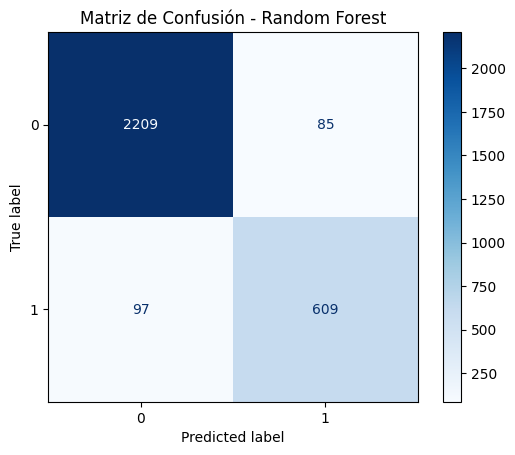

In [18]:
# Matriz de Confución
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
 
# Crear matriz
cm = confusion_matrix(y_test, y_pred)
 
# Mostrar matriz
disp = ConfusionMatrixDisplay(cm)
 
plt.figure(figsize=(6,5))
disp.plot(values_format='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.show()

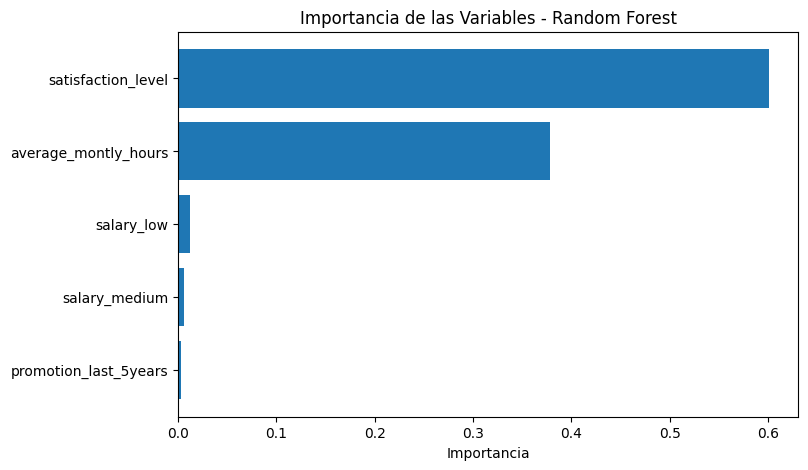

,Variable,Importancia
0,satisfaction_level,0.600608
1,average_montly_hours,0.377800
3,salary_low,0.012071
4,salary_medium,0.006380
2,promotion_last_5years,0.003141


In [19]:
# Importancia del modelo
importances = modelo.feature_importances_
 
# Crear un dataframe ordenado
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
}).sort_values('Importancia', ascending=False)
 
# Gráfico
plt.figure(figsize=(8,5))
plt.barh(importance_df['Variable'], importance_df['Importancia'])
plt.gca().invert_yaxis()
plt.title("Importancia de las Variables - Random Forest")
plt.xlabel("Importancia")
plt.show()
 
importance_df

#### **6. Despliegue**

- **Objetivo de CRISP-DM:** Guiar los proyectos de mineria de datos, asegurando que se cumplan los objetivos de negocio y se maximece el valor obtenido de los datos, en nuestro caso disminuir la alta rotación del personal en la compañía. Con el fín de que a través de las fases del proceso se puedan identificar las causas de su retiro, y por ende predecir las futuras salidas. En base a esta información, se pueden tomar decisiones estrategicas para lograr una estabilidad laboral de los colaboradores.

- **Métrica principal de éxito:** Las métricas que representan principalmente el éxito del modelo son Accuracy = 94% evidenciando la correcta clasificación de los empleados (quienes se quedan y quienes se van), y la Métrica F1 Global = 0.94 mostrando un buen equilibrio del modelo en general. Confirmando que el modelo seleccionado es útil para predecir el comportamiento futuro de los empleados 

- **Problema encontrado y plan de resolución:** En el análisis de los datos obtenidos de recursos humanos, se evidencia que el factor principal de salida es el nivel de satisfación del empleado, sin embargo, esto se puede evaluar a mayor profundidad mediante un dashboard, revisando las variables implicadas, su comportamiento y los KPI en tiempo real. De esta manera, se puede hacer un control más oportuno frente a la problemática de deserción laboral.  

-------------------------------------------------------------------------------------------------------------------------------------------

### **Conclusiones**

+ El modelo seleccionado Randomforest clasifica correctamente el 94% de los empleados, detecta con muy buena efectividad quienes no se van (96%), predice bien quienes si se van (86% - 88%) y muestra un buen equilibrio general (F1 global = 0.94). Por lo tanto, es un modelo solido y útil para identificar factores que predicen renuncia laboral.

+ La matriz de confusión confirma que el modelo Random Forest clasifica de forma efectiva a los empleados, identificando con alta precisión a quienes no renuncian y con buen desempeño a quienes sí se van. Aunque presenta algunos errores en la detección de renuncias, en general ofrece predicciones confiables para apoyar el análisis de rotación laboral.

+ Se evidencia que el nivel de satisfacción es la variable más determinante para predecir la salida de los empleados.

-------------------------------------------------------------------------------------------------------------------------------------------

### **Bibliografía**


+ Instituto de Ingeniería del Conocimiento (IIC), Universidad Autónoma de Madrid. (s. f.). La metodología CRISP-DM en ciencia de datos. Recuperado de https://www.iic.uam.es/innovacion/metodologia-crisp-dm-ciencia-de-datos/ iic.uam.es

+ GeeksforGeeks. (2025, 23 de julio). How to fit categorical data types for random forest classification. Recuperado de https://www.geeksforgeeks.org/machine-learning/how-to-fit-categorical-data-types-for-random-forest-classification/ 

+ Mercado, L. (2023, 3 de noviembre). CRISP-DM: A Guide to the Strategic Approach to Data Mining. Outsource-Philippines. Recuperado de https://outsource-philippines.com/what-is-crisp-dm/
